`# Import dependencies`

In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib
import plotly.io as pio

pio.renderers.default = 'iframe'
pd.options.plotting.backend = 'plotly'

`# Get stock market data`

In [6]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)

yf.pdr_override()
df = pdr.get_data_yahoo('NVDA', start, end)
df.head()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,4.89450,4.98750,4.86250,4.98375,4.930643,355616000
2018-01-03,5.10250,5.34250,5.09375,5.31175,5.255147,914704000
2018-01-04,5.39400,5.45125,5.31725,5.33975,5.282849,583268000
2018-01-05,5.35475,5.42275,5.27700,5.38500,5.327617,580124000
2018-01-08,5.51000,5.62500,5.46450,5.55000,5.490859,881216000


`# Calculate daily simple returns`

In [12]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-03    0.065814
2018-01-04    0.005271
2018-01-05    0.008474
2018-01-08    0.030641
2018-01-09   -0.000270
                ...   
2024-07-15   -0.006190
2024-07-16   -0.016194
2024-07-17   -0.066239
2024-07-18    0.026273
2024-07-19   -0.026096
Name: Close, Length: 1646, dtype: float64

`# Calculate daily log returns`

In [14]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2018-01-03    0.063739
2018-01-04    0.005257
2018-01-05    0.008439
2018-01-08    0.030181
2018-01-09   -0.000270
                ...   
2024-07-15   -0.006209
2024-07-16   -0.016327
2024-07-17   -0.068535
2024-07-18    0.025934
2024-07-19   -0.026443
Name: Close, Length: 1646, dtype: float64

`# Histogram of log returns`

In [16]:
log_returns.plot(kind = 'hist')

`# Check normality assumption for financial data`

In [28]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

print('Std dev worst %.2f best %2f' %(std_worst, std_best))
print('Probability worst %.12f best %.12f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Std dev worst -6.47 best 6.676274
Probability worst 0.000000000315 best 0.000000000084


`# Q-Q plot`

Q-Q Plot


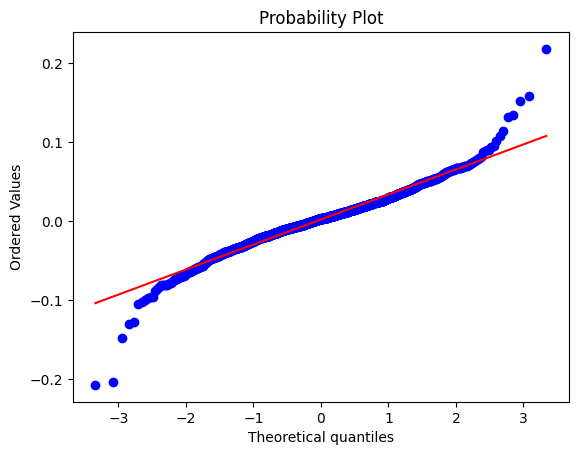

In [29]:
stats.probplot(log_returns, dist = 'norm', plot = pylab)
print('Q-Q Plot')

 `# Box Plot`

In [30]:
log_returns.plot(kind = 'box')

`# Kolmogorov Smirnov test`

In [32]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

0.4592950809072288 3.933296e-318
Probably NOT Gaussian


`# Shapiro Wilk test`

In [33]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

0.9594973438218095 5.274439735485171e-21
Probably NOT Gaussian
